In [1]:
!pwd

/pscratch/sd/n/nishank/scripts


In [2]:
import utils
import h5py as h5
import numpy as np

filepaths = [
    '/global/cfs/cdirs/m3246/vmikuni/TOP/gluon_train.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/top_train.h5'
]

with h5.File(filepaths[0], "r") as h5f:
    real_gluon_parts = h5f['data'][()].astype(np.float32)
    real_gluon_jets = h5f['jet'][()].astype(np.float32)
with h5.File(filepaths[1], "r") as h5f:
    real_top_parts = h5f['data'][()].astype(np.float32)
    real_top_jets = h5f['jet'][()].astype(np.float32)
    
print(real_top_parts.shape)

(605477, 100, 3)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import gridspec
import argparse
import h5py as h5
import os
import utils
import tensorflow as tf
from GSGM_uniform import GSGM
from deepsets_cond import DeepSetsAttClass
import time
import gc
import sys
from sklearn.metrics import roc_curve, auc



processes = ['gluon_tagging']
config = utils.LoadJson('config_AD.json')
npart = 100
nll_qcd = {}
#model_gluon = GSGM(config=config,npart=npart,particle='gluon_tagging',ll_training=True) MY OLD MODEL
model_gluon = GSGM(config=config,npart=npart,particle='gluon_tagging',ll_training=False)
#checkpoint_folder_gluon = '../checkpoints_{}/checkpoint'.format('GSGM_ll'+ '_gluon_tagging')  MY FILE PATH FOR MY TRAINED MODEL
checkpoint_folder_gluon = '/global/cfs/cdirs/m3246/vmikuni/for_nishank/checkpoints_{}/checkpoint'.format('GSGM'+ '_gluon_tagging')
model_gluon.load_weights('{}'.format(checkpoint_folder_gluon)).expect_partial()

model_top = GSGM(config=config,npart=npart,particle='top_tagging',ll_training=False)
checkpoint_folder_top = '/global/cfs/cdirs/m3246/vmikuni/for_nishank/checkpoints_{}/checkpoint'.format('GSGM'+ '_top_tagging')
model_top.load_weights('{}'.format(checkpoint_folder_top)).expect_partial()

    #changed
    # model_top = GSGM(config=config,npart=npart,particle='top_tagging',ll_training=flags.ll)
    # checkpoint_folder_top = '../checkpoints_{}/checkpoint'.format(model_name+ '_top_tagging')
    # model_top.load_weights('{}'.format(checkpoint_folder_top)).expect_partial()
    # nll_top = {}


# gluon_parts, gluon_jets, init_noise_parts, init_noise_jets, mask_gluon = model_gluon.generate(1000)
# top_parts, top_jets,top_init_noise_parts,top_init_noise_jets, mask_top = model_top.generate(1000)


#create particles
gluon_jets,init_noise_jets, mask = model_gluon.generate(200000)
top_jets,top_init_noise_jets, top_mask = model_top.generate(200000)
#nll_qcd[process] = evaluate(model_gluon,particles,jets,mask,flags.nidx)
#nll_top[process] = evaluate(model_top,particles,jets,mask,flags.nidx)

#data_size,training_data,test_data = utils.DataLoader('/pscratch/sd/n/nishank/data/TOPTAGGING',
#                                                     ['gluon_tagging.h5'],'gluon_tagging', make_tf_data=False)

#ADDED CODE 1/10/2024
# plt.hist(init_noise_jets.numpy().flatten(), bins=50, alpha=0.7, label='Initial Particle Noise')
# plt.xlabel('Initial Noise Value')
# plt.ylabel('Number of Events')
# plt.title('Histogram of Initial Jet Noise')
# plt.legend()
# plt.show()
#END ADDED CODE 1/10/2024

#ADDED CODE 1/10/2024
# plt.hist(gluon_jets.flatten(), bins=50, alpha=0.7, label='Generated Particle Data')
# plt.xlabel('Generated Particle Value')
# plt.ylabel('Number of Events')
# plt.title('Histogram of Generated Jet Data')
# plt.legend()
# plt.show()
#END ADDED CODE 1/10/2024


#log (p(jets)) * log(P(jets given particles))


#ADDED CODE 1/10/2024
# plt.hist(final_noise_jets.flatten(), bins=50, alpha=0.7, label='Final Particle Noise')
# plt.xlabel('Final Noise Value')
# plt.ylabel('Number of Events')
# plt.title('Histogram of Final Jet Noise')
# plt.legend()
# plt.show()
#END ADDED CODE 1/10/2024

2024-03-12 18:19:53.629052: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 18:19:56.022341: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78933 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-03-12 18:19:56.026982: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78933 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-03-12 18:19:56.028440: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

Time for sampling 200000 events is 11.306541204452515 seconds
Time for sampling 200000 events is 9.5367431640625e-07 seconds
Time for sampling 200000 events is 5.3651204109191895 seconds
Time for sampling 200000 events is 7.152557373046875e-07 seconds


In [ ]:
# VINNIE DATA

vin_filepath = 'CFS/m3246/vmikuni/for_nishank'

In [ ]:
# ll_gluon_parts, final_noise_parts = model_gluon.Likelihood(gluon_parts.numpy(), model_gluon.ema_part,
#                                                            gluon_jets.numpy(),mask_gluon.astype(np.float32))
# ll_top_parts, final_noise_parts = model_top.Likelihood(gluon_parts.numpy(), model_top.ema_part,
#                                                            gluon_jets.numpy(),mask_gluon.astype(np.float32))

# ll_gluon_parts_top, final_noise_parts = model_gluon.Likelihood(top_parts.numpy(), model_gluon.ema_part,
#                                                            gluon_jets.numpy(),mask_top.astype(np.float32))
# ll_top_parts_top, final_noise_parts = model_top.Likelihood(top_parts.numpy(), model_top.ema_part,
#                                                            gluon_jets.numpy(),mask_top.astype(np.float32))


ll_gluon_jets, final_noise_jets = model_gluon.Likelihood(gluon_jets, model_gluon.ema_jet)
ll_top_jets, final_noise_jets_top = model_top.Likelihood(gluon_jets, model_top.ema_jet)
#llr_gluon = ll_top_jets - ll_gluon_jets #plus top parts minus gluon parts

ll_gluon_jets_top, final_noise_jets_top = model_gluon.Likelihood(top_jets, model_gluon.ema_jet)
ll_top_jets_top, final_noise_jets_top_top = model_top.Likelihood(top_jets, model_top.ema_jet)
#llr_top = ll_top_jets_top - ll_gluon_jets_top #plus top parts minus gluon parts

llr_gluon = ll_top_jets - ll_gluon_jets #+ ll_top_parts - ll_gluon_parts #plus top parts minus gluon parts

llr_top = ll_top_jets_top - ll_gluon_jets_top #+ ll_top_parts_top - ll_gluon_parts_top #plus top parts minus gluon parts

#make it for particles separately

llr = np.concatenate([llr_top, llr_gluon], 0)
labels = np.concatenate([np.ones(llr_top.shape[0]), np.zeros(llr_gluon.shape[0])], 0)

In [ ]:
fpr, tpr, _ = roc_curve(labels,llr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr, tpr)))
plt.plot(tpr,fpr,label="ROC Curve of Likelihood Ratio",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

### Code for classifier of original data

In [2]:
from utils import DataLoader
import horovod.tensorflow.keras as hvd
hvd.init()
loaded_gluon_parts,loaded_gluon_jets,loaded_mask_gluon = DataLoader('/pscratch/sd/n/nishank/data/TOPTAGGING',
                                                     ['gluon_tagging.h5'],
                                                     'gluon_tagging',
                                                     hvd.rank(),
                                                     hvd.size(),
                                                     use_train = False, 
                                                     make_tf_data=False)

loaded_top_parts,loaded_top_jets,loaded_mask_top = DataLoader('/pscratch/sd/n/nishank/data/TOPTAGGING',
                                                     ['top_tagging.h5'],
                                                     'top_tagging',
                                                     hvd.rank(),
                                                     hvd.size(),
                                                     use_train = False, 
                                                     make_tf_data=False)

In [11]:
from sklearn.utils import shuffle
loaded_X = np.concatenate([loaded_gluon_jets, loaded_top_jets], 0)
loaded_Y = np.concatenate([np.array([1 for i in range(200000)]), np.array([0 for i in range(200000)])], 0)
print(loaded_X.shape)
print(loaded_Y.shape)
mean = loaded_X.mean(axis=0)
loaded_X -= mean
std = loaded_X.std(axis=0)
loaded_X /= std
loaded_X, loaded_Y = shuffle(loaded_X, loaded_Y, random_state=0)
print(loaded_X.shape)
print(loaded_Y.shape)

(400000, 4)
(400000,)
(400000, 4)
(400000,)


In [12]:
#CLASSIFIER for original data
#input gluon and top jets and then input the actual labels to train the loss function with 3 or so layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model_original = Sequential()
model_original.add(Dense(50, input_dim = len(loaded_gluon_jets[0, :]), activation = 'relu'))
model_original.add(Dense(50, activation = 'relu'))
model_original.add(Dense(1, activation = 'sigmoid'))
model_original.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 50)                250       
                                                                 
 dense_93 (Dense)            (None, 50)                2550      
                                                                 
 dense_94 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_original.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [14]:
model_original.fit(x = loaded_X, y = loaded_Y, epochs = 128, verbose = 1)

Epoch 1/128
12500/12500 [==============================] - 14s 1ms/step - loss: 0.5889 - accuracy: 0.6665
Epoch 2/128
12500/12500 [==============================] - 13s 1ms/step - loss: 0.5807 - accuracy: 0.6732
Epoch 3/128
12500/12500 [==============================] - 13s 1ms/step - loss: 0.5786 - accuracy: 0.6756
Epoch 4/128
12500/12500 [==============================] - 13s 1ms/step - loss: 0.5771 - accuracy: 0.6766
Epoch 5/128
12500/12500 [==============================] - 13s 1ms/step - loss: 0.5760 - accuracy: 0.6771
Epoch 6/128
12500/12500 [==============================] - 13s 1ms/step - loss: 0.5751 - accuracy: 0.6779
Epoch 7/128
12500/12500 [==============================] - 13s 1ms/step - loss: 0.5745 - accuracy: 0.6780
Epoch 8/128
12500/12500 [==============================] - 13s 1ms/step - loss: 0.5740 - accuracy: 0.6787
Epoch 9/128
12500/12500 [==============================] - 13s 1ms/step - loss: 0.5734 - accuracy: 0.6791
Epoch 10/128
12500/12500 [====================

In [ ]:
prediction_original = model_original.predict(loaded_X)
print(prediction_original[:5])

12500/12500 [==============================] - 7s 533us/step
[[0.06055893]
 [0.5191307 ]
 [0.4707552 ]
 [0.61572176]
 [0.7410322 ]]


Classifier AUC: 0.7600499421125


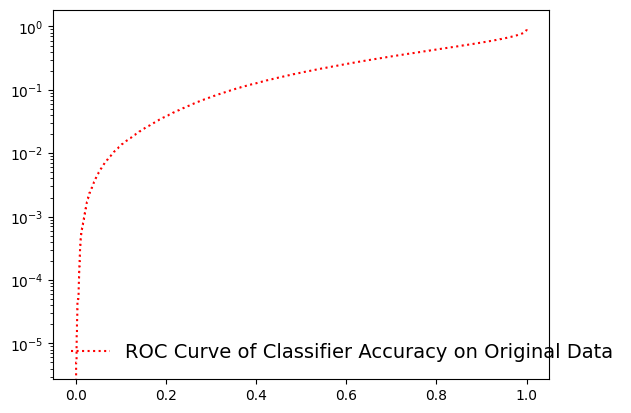

In [ ]:
fpr_orig, tpr_orig, _ = roc_curve(loaded_Y,prediction_original, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_orig, tpr_orig)))
plt.plot(tpr_orig,fpr_orig,label="ROC Curve of Classifier Accuracy on Original Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

### Code for classifier on synthetic data

In [13]:
#LOADING IN ORIGINAL DATA TO COMPARE ORIIGNAL AND SYNTHETIC
gluon_data_particles, gluon_data_jets, _ = utils.DataLoader('/pscratch/sd/n/nishank/data/TOPTAGGING',
                                                     ['gluon_tagging.h5'],'gluon_tagging', use_train = False, make_tf_data=False)
top_data_particles, top_data_jets, _ = utils.DataLoader('/pscratch/sd/n/nishank/data/TOPTAGGING',
                                                     ['top_tagging.h5'],'top_tagging', use_train = False, make_tf_data=False)

In [14]:
print(gluon_data_jets.shape,top_data_jets.shape)

(200000, 4) (200000, 4)


In [ ]:
# data_dict = {
#                 'max_jet':np.max(gluon_data_jets,0).tolist(),
#                 'min_jet':np.min(gluon_data_jets,0).tolist(),
#                 'mean_jet':np.mean(gluon_data_jets,0).tolist(),
#                 'std_jet':np.std(gluon_data_jets,0).tolist()
#             }
# gluon_data_jets = np.ma.divide(gluon_data_jets-data_dict['mean_jet'],np.array(data_dict['std_jet']))
# print(gluon_data_jets.shape)
# data_dict = {
#                 'max_jet':np.max(top_data_jets,0).tolist(),
#                 'min_jet':np.min(top_data_jets,0).tolist(),
#                 'mean_jet':np.mean(top_data_jets,0).tolist(),
#                 'std_jet':np.std(top_data_jets,0).tolist()
#             }
# top_data_jets = np.ma.divide(top_data_jets-data_dict['mean_jet'],np.array(data_dict['std_jet']))
# print(top_data_jets.shape)

In [3]:
data_dict = {
                'max_jet':np.max(gluon_jets,0).tolist(),
                'min_jet':np.min(gluon_jets,0).tolist(),
                'mean_jet':np.mean(gluon_jets,0).tolist(),
                'std_jet':np.std(gluon_jets,0).tolist()
            }
gluon_jets = np.ma.divide(gluon_jets-data_dict['mean_jet'],np.array(data_dict['std_jet']))
print(gluon_jets.shape)

(200000, 4)


In [4]:
data_dict = {
                'max_jet':np.max(top_jets,0).tolist(),
                'min_jet':np.min(top_jets,0).tolist(),
                'mean_jet':np.mean(top_jets,0).tolist(),
                'std_jet':np.std(top_jets,0).tolist()
            }
top_jets = np.ma.divide(top_jets-data_dict['mean_jet'],np.array(data_dict['std_jet']))
print(top_jets.shape)

(200000, 4)


In [5]:
X = np.concatenate([gluon_jets, top_jets], 0)
Y = np.concatenate([np.array([1 for i in range(200000)]), np.array([0 for i in range(200000)])], 0)

In [6]:
print(X.shape)
print(Y.shape)

(400000, 4)
(400000,)


In [7]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

In [8]:
print(X.shape)
print(Y.shape)

(400000, 4)
(400000,)


In [15]:
#REAL VS FAKE
from sklearn.utils import shuffle
X = np.concatenate([gluon_data_jets, gluon_jets], 0)
Y = np.concatenate([np.array([1 for i in range(200000)]), np.array([0 for i in range(200000)])], 0)
X, Y = shuffle(X, Y, random_state=1234)
print(X.shape)
print(Y.shape)

(400000, 4)
(400000,)


In [23]:
#REAL VS FAKE
from sklearn.utils import shuffle
X = np.concatenate([top_data_jets, top_jets], 0)
Y = np.concatenate([np.array([1 for i in range(200000)]), np.array([0 for i in range(200000)])], 0)
X, Y = shuffle(X, Y, random_state=1234)
print(X.shape)
print(Y.shape)

(400000, 4)
(400000,)


In [24]:
#CLASSIFIER
#input gluon and top jets and then input the actual labels to train the loss function with 3 or so layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_dim = len(gluon_jets[0, :]), activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 50)                250       
                                                                 
 dense_99 (Dense)            (None, 50)                2550      
                                                                 
 dense_100 (Dense)           (None, 1)                 51        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [27]:
model.fit(x = X, y = Y, epochs = 60, verbose = 1) 

Epoch 1/60
12500/12500 [==============================] - 13s 1ms/step - loss: 0.6757 - accuracy: 0.5681
Epoch 2/60
12500/12500 [==============================] - 13s 1ms/step - loss: 0.6705 - accuracy: 0.5797
Epoch 3/60
12500/12500 [==============================] - 13s 1ms/step - loss: 0.6688 - accuracy: 0.5839
Epoch 4/60
12500/12500 [==============================] - 13s 1ms/step - loss: 0.6680 - accuracy: 0.5856
Epoch 5/60
12500/12500 [==============================] - 13s 1ms/step - loss: 0.6677 - accuracy: 0.5863
Epoch 6/60
12500/12500 [==============================] - 13s 1ms/step - loss: 0.6674 - accuracy: 0.5870
Epoch 7/60
12500/12500 [==============================] - 13s 1ms/step - loss: 0.6673 - accuracy: 0.5869
Epoch 8/60
12500/12500 [==============================] - 13s 1ms/step - loss: 0.6671 - accuracy: 0.5880
Epoch 9/60
12500/12500 [==============================] - 13s 1ms/step - loss: 0.6669 - accuracy: 0.5887
Epoch 10/60
12500/12500 [==============================

In [ ]:
prediction = model.predict(X)
print(prediction[:5])

Classifier AUC: 0.6389765123125


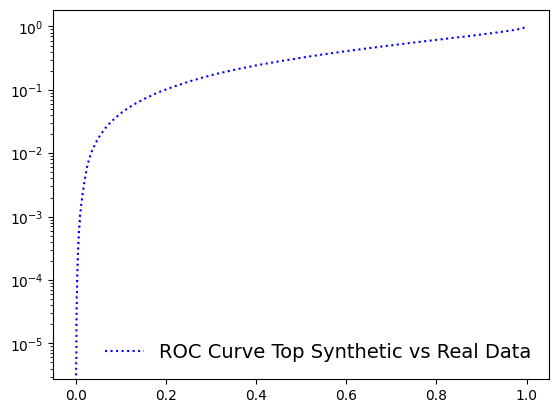

In [30]:
fpr_synth, tpr_synth, _ = roc_curve(Y,prediction, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_synth, tpr_synth)))
plt.plot(tpr_synth,fpr_synth,label="ROC Curve Top Synthetic vs Real Data",
                         color='blue',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

In [ ]:
fpr_synth, tpr_synth, _ = roc_curve(Y,prediction, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_synth, tpr_synth)))
plt.plot(tpr_synth,fpr_synth,label="ROC Curve of Classifier Accuracy on Synthetic Data",
                         color='blue',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

#### plot of all

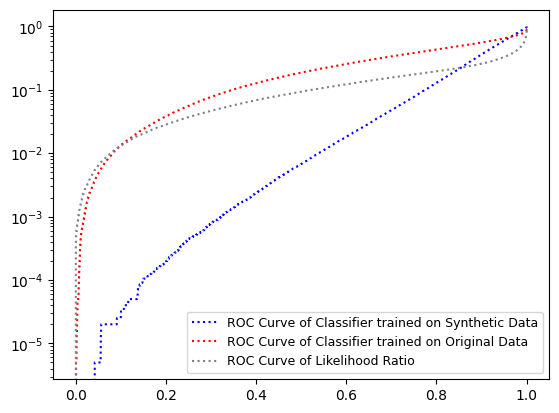

In [37]:
plt.plot(tpr_synth,fpr_synth,label="ROC Curve of Classifier trained on Synthetic Data",
                         color='blue',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.plot(tpr_orig,fpr_orig,label="ROC Curve of Classifier trained on Original Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.plot(tpr,fpr,label="ROC Curve of Likelihood Ratio",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=True,fontsize=9)
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
my_acc = accuracy_score(Y, prediction.round())
print(my_acc)

0.8344925


In [76]:
X_with_time = np.expand_dims(X[:int(.85*len(Y)), :], axis=1)  # This will change the shape to (400000, 1, 4)

X_tf_train_v2 = tf.data.Dataset.from_tensor_slices(X_with_time)
Y_tf_train_v2 = tf.data.Dataset.from_tensor_slices(Y[:int(.85*len(Y))])

training_data = tf.data.Dataset.zip((X_tf_train_v2, Y_tf_train_v2))
training_data = training_data.shuffle(buffer_size=len(Y)).batch(128)
training_data = training_data.repeat()

In [77]:
X_tf_test_with_time = np.expand_dims(X[int(.7*len(Y)):, :], axis=1)  # Add time dimension
validation_data = (X_tf_test_with_time, Y_tf_test)

In [78]:
full_X_with_time = np.expand_dims(X, axis=1)

In [79]:
import numpy as np
import os,re
import tensorflow as tf
from tensorflow import keras
import time
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

import argparse
import utils
from GSGM_uniform import GSGM
from deepsets_cond import DeepSetsAttClass
from tensorflow.keras.callbacks import ModelCheckpoint
import horovod.tensorflow.keras as hvd

tf.random.set_seed(1233)

hvd.init()

labels = Y_tf_train_v2

inputs, outputs = DeepSetsAttClass(4,
            num_heads=2,
            num_transformer = 6,
            projection_dim = 128,)
loss="binary_crossentropy"
model = keras.Model(inputs=inputs,outputs=outputs)
model_name = 'SupervisedClassifierforJets'
checkpoint_folder = '../checkpoints_{}/checkpoint'.format(model_name)
# print(hvd.size())
# print(hvd.size())
# print(hvd.size())
lr_schedule = tf.keras.experimental.CosineDecay(
        initial_learning_rate=.0003*hvd.size(),
        decay_steps=200*int(len(Y)*0.8/128)
    )
opt = tf.keras.optimizers.Adamax(learning_rate=lr_schedule)
  
opt = hvd.DistributedOptimizer(
        opt, average_aggregated_gradients=True)

        
model.compile(            
        optimizer=opt,
        #run_eagerly=True,
        experimental_run_tf_function=False,
        loss = loss,
        weighted_metrics=[])
callbacks = [
        hvd.callbacks.BroadcastGlobalVariablesCallback(0),
        hvd.callbacks.MetricAverageCallback(),
        EarlyStopping(patience=50,restore_best_weights=True),
    ]

# print(hvd.rank())  
# print(hvd.rank())
# print(hvd.rank())  

# if hvd.rank()==0:
#         checkpoint = ModelCheckpoint(checkpoint_folder,mode='auto',
#                                      save_best_only=True,
#                                      period=1,save_weights_only=True)
#         callbacks.append(checkpoint)
        
    
history = model.fit(
        training_data,
        epochs=60,
        callbacks=callbacks,
        steps_per_epoch=int(len(Y_tf_train_v2)*.8/128),
        validation_data=validation_data,
        validation_steps=int(len(Y_tf_train_v2)*0.1/128),
        verbose=1 if hvd.rank()==0 else 0,
        #steps_per_epoch=1,
    )

Epoch 1/60
2125/2125 [==============================] - 31s 12ms/step - loss: 0.3876 - val_loss: 0.3830
Epoch 2/60
2125/2125 [==============================] - 26s 12ms/step - loss: 0.3830 - val_loss: 0.3900
Epoch 3/60
2125/2125 [==============================] - 27s 12ms/step - loss: 0.3803 - val_loss: 0.3831
Epoch 4/60
2125/2125 [==============================] - 27s 13ms/step - loss: 0.3810 - val_loss: 0.3840
Epoch 5/60
2125/2125 [==============================] - 26s 12ms/step - loss: 0.3799 - val_loss: 0.3822
Epoch 6/60
2125/2125 [==============================] - 27s 13ms/step - loss: 0.3806 - val_loss: 0.3812
Epoch 7/60
2125/2125 [==============================] - 27s 13ms/step - loss: 0.3790 - val_loss: 0.3807
Epoch 8/60
2125/2125 [==============================] - 27s 13ms/step - loss: 0.3794 - val_loss: 0.3840
Epoch 9/60
2125/2125 [==============================] - 27s 13ms/step - loss: 0.3791 - val_loss: 0.3808
Epoch 10/60
2125/2125 [==============================] - 26s 12m

In [81]:
predictions = model.predict(full_X_with_time)

12500/12500 [==============================] - 37s 3ms/step


Classifier AUC: 0.8989924006125


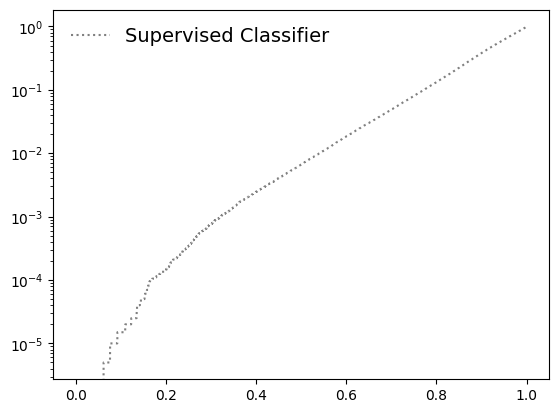

In [82]:
fpr, tpr, _ = roc_curve(Y,predictions, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr, tpr)))
plt.plot(tpr,fpr,label="Supervised Classifier",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

12500/12500 [==============================] - 40s 3ms/step
Classifier AUC: 0.9822879554374999


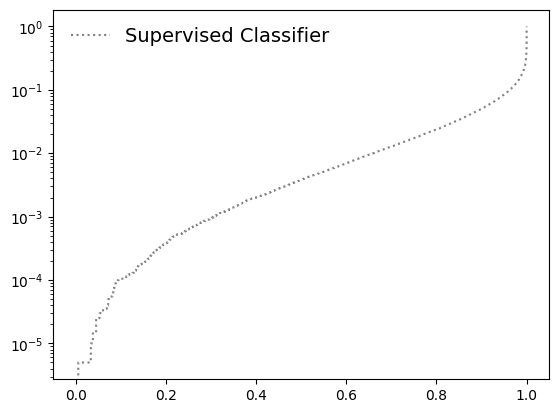

In [27]:
import plt_new
labels_top,likelihoods_top = plt_new.evaluate_classifier(
                    3,
                    '../checkpoints_{}/checkpoint'.format('GSGM_class_gluon_tagging'),
                    '/pscratch/sd/n/nishank/data/TOPTAGGING/',
                )
fpr, tpr, _ = roc_curve(labels_top,likelihoods_top, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr, tpr)))
plt.plot(tpr,fpr,label="Supervised Classifier",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

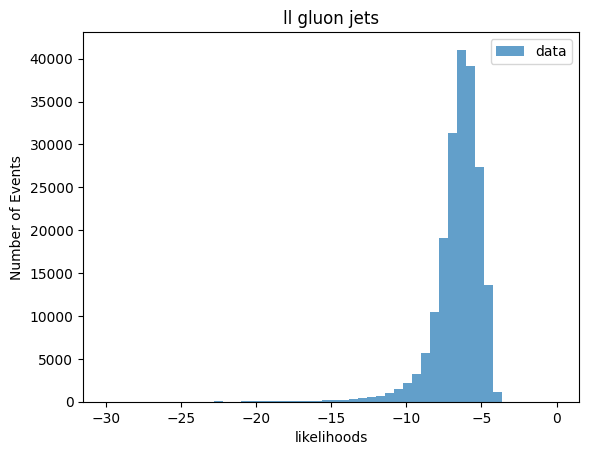

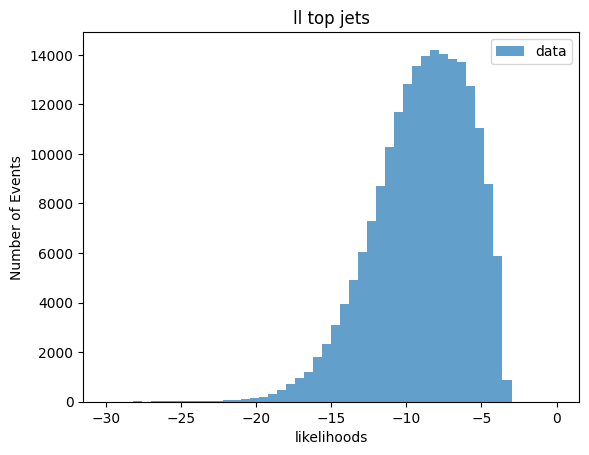

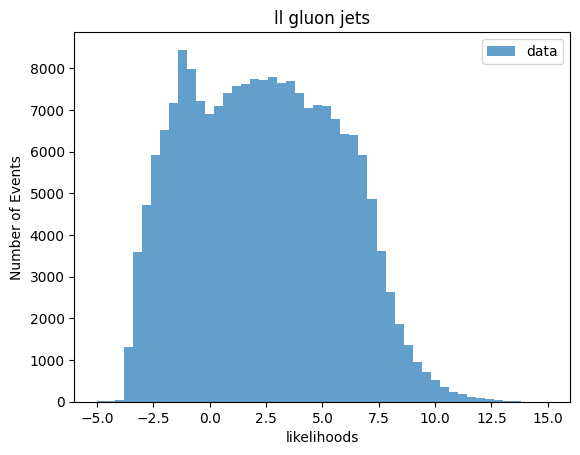

In [5]:
plt.hist(ll_gluon_jets, bins=50, range=(-30, 0), alpha=0.7, label= 'data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll gluon jets')
plt.legend()
plt.show()
plt.hist(ll_top_jets, bins=50, range=(-30, 0), alpha=0.7, label='data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll top jets')
plt.legend()
plt.show()
plt.hist(ll_gluon_jets - ll_top_jets, bins=50, range=(-5, 15), alpha=0.7, label= 'data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll gluon jets')
plt.legend()
plt.show()

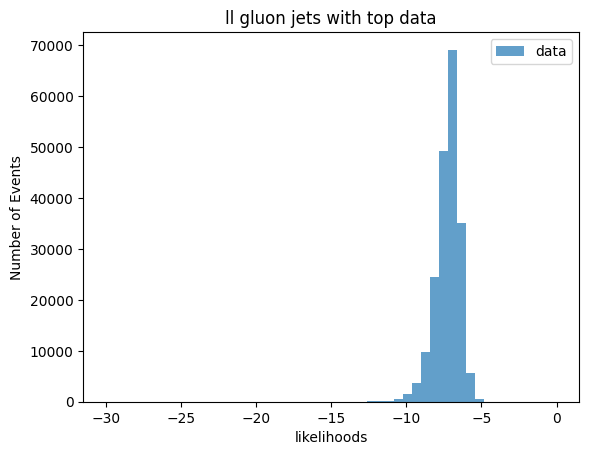

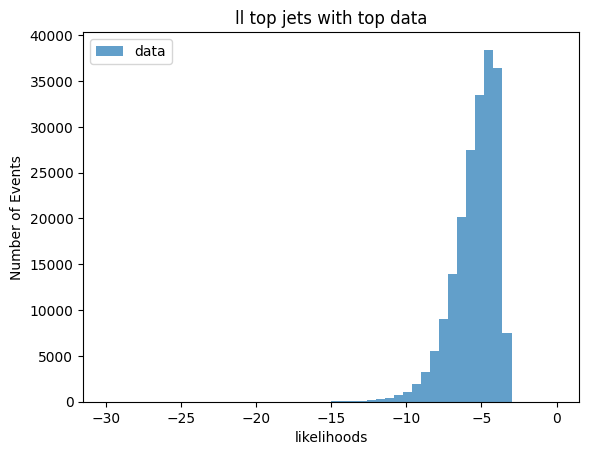

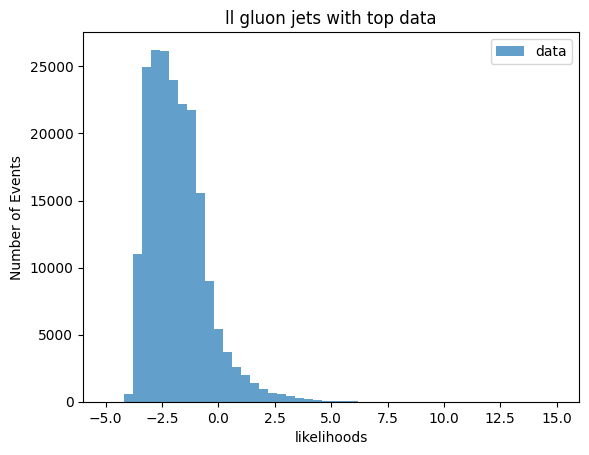

In [6]:
plt.hist(ll_gluon_jets_top, bins=50, range=(-30, 0), alpha=0.7, label= 'data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll gluon jets with top data')
plt.legend()
plt.show()
plt.hist(ll_top_jets_top, bins=50, range=(-30, 0), alpha=0.7, label='data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll top jets with top data')
plt.legend()
plt.show()
plt.hist(ll_gluon_jets_top - ll_top_jets_top, bins=50, range=(-5, 15), alpha=0.7, label= 'data')
plt.xlabel('likelihoods')
plt.ylabel('Number of Events')
plt.title('ll gluon jets with top data')
plt.legend()
plt.show()

In [5]:
import utils

data_particles, data_jets, _ = utils.DataLoader('/pscratch/sd/n/nishank/data/TOPTAGGING',
                                                     ['gluon_tagging.h5'],'gluon_tagging', use_train = False, make_tf_data=False)
top_data_particles, top_data_jets, _ = utils.DataLoader('/pscratch/sd/n/nishank/data/TOPTAGGING',
                                                     ['top_tagging.h5'],'top_tagging', use_train = False, make_tf_data=False)

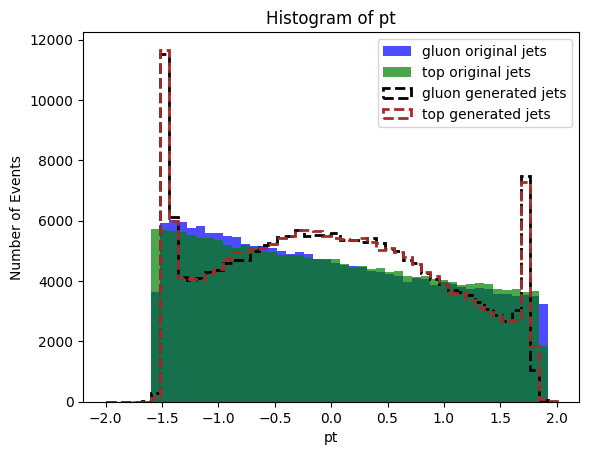

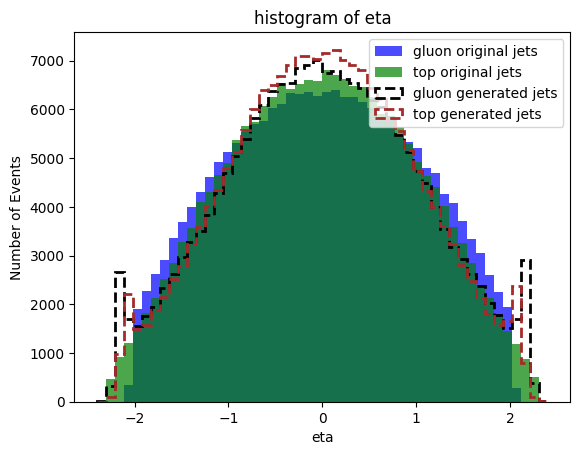

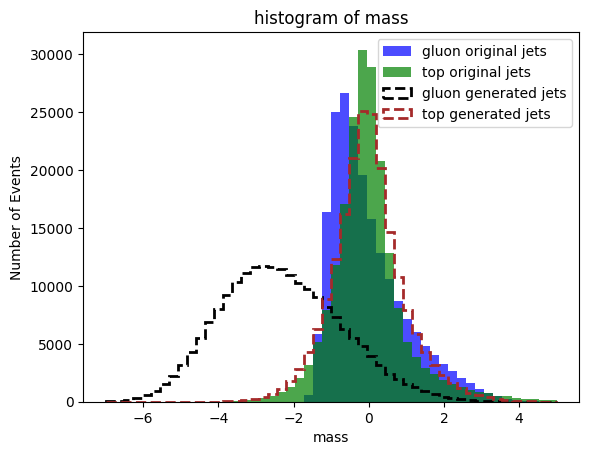

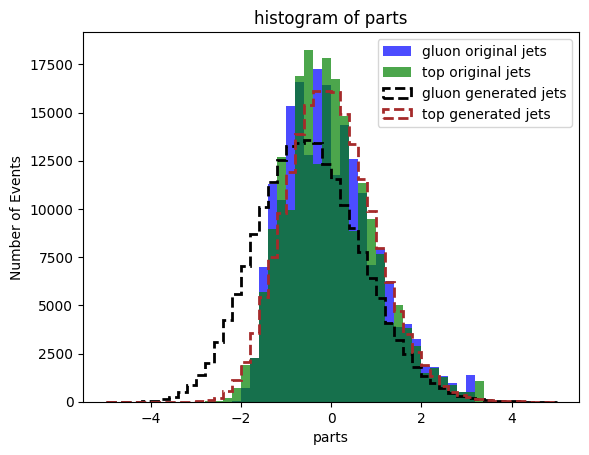

In [42]:
plt.hist(data_jets[:,0], bins=50, range=(-2, 2), alpha=0.7, color='blue', label='gluon original jets')
plt.hist(top_data_jets[:,0], bins=50, range=(-2, 2), alpha=0.7, color='green', label='top original jets')
plt.hist(gluon_jets[:,0], bins=50, range=(-2, 2), histtype='step', linewidth=2, linestyle = 'dashed', color='black', label='gluon generated jets')
plt.hist(top_jets[:,0], bins=50, range=(-2, 2), histtype='step', linewidth=2, linestyle = 'dashed', color='brown', label='top generated jets')
plt.xlabel('pt')
plt.ylabel('Number of Events')
plt.title('Histogram of pt')
plt.legend()
plt.show()
plt.hist(data_jets[:,1], bins=50, range=(-2.4, 2.4), alpha=0.7, color='blue', label='gluon original jets')
plt.hist(top_data_jets[:,1], bins=50, range=(-2.4, 2.4), alpha=0.7, color='green', label='top original jets')
plt.hist(gluon_jets[:,1], bins=50, range=(-2.4, 2.4), histtype='step', linewidth=2, linestyle = 'dashed', color='black', label='gluon generated jets')
plt.hist(top_jets[:,1], bins=50, range=(-2.4, 2.4), histtype='step', linewidth=2, linestyle = 'dashed', color='brown', label='top generated jets')
plt.xlabel('eta')
plt.ylabel('Number of Events')
plt.title('histogram of eta')
plt.legend()
plt.show()
plt.hist(data_jets[:,2], bins=50, range=(-7, 5), alpha=0.7, color='blue', label='gluon original jets')
plt.hist(top_data_jets[:,2], bins=50, range=(-7, 5), alpha=0.7, color='green', label='top original jets')
plt.hist(gluon_jets[:,2], bins=50, range=(-7, 5), histtype='step', linewidth=2, linestyle = '--', color='black', label='gluon generated jets')
plt.hist(top_jets[:,2], bins=50, range=(-7, 5), histtype='step', linewidth=2, linestyle = '--', color='brown', label='top generated jets')
plt.xlabel('mass')
plt.ylabel('Number of Events')
plt.title('histogram of mass')
plt.legend()
plt.show()
plt.hist(data_jets[:,3], bins=50, range=(-5, 5), alpha=0.7, color='blue', label='gluon original jets')
plt.hist(top_data_jets[:,3], bins=50, range=(-5, 5), alpha=0.7, color='green', label='top original jets')
plt.hist(gluon_jets[:,3], bins=50, range=(-5, 5), histtype='step', linewidth=2, linestyle = 'dashed', color='black', label='gluon generated jets')
plt.hist(top_jets[:,3], bins=50, range=(-5,5), histtype='step', linewidth=2, linestyle = 'dashed', color='brown', label='top generated jets')
plt.xlabel('parts')
plt.ylabel('Number of Events')
plt.title('histogram of parts')
plt.legend()
plt.show()

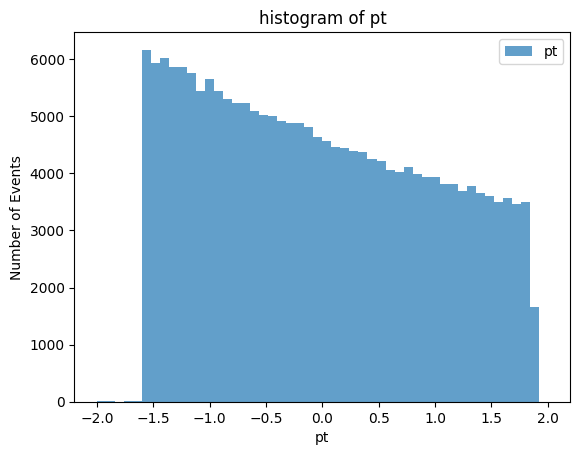

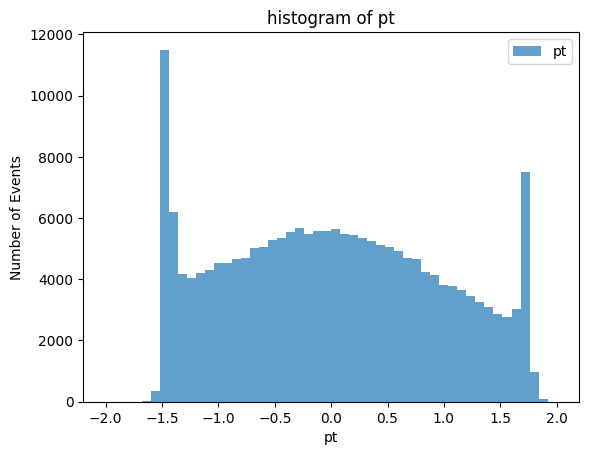

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(51,) (50,)
[ 0.          0.          0.          9.          1.46153846 18.07917889
  0.51574187  0.96764848  1.40817308  1.44928253  1.37154433  1.26766146
  1.24994465  1.20362191  1.13403164  1.11281071  1.0389662   1.0035524
  0.95188483  0.93577982  0.88732394  0.8634758   0.88783685  0.861136
  0.83456213  0.81052818  0.81239745  0.81921944  0.82424583  0.82985188
  0.8278481   0.8336963   0.82713036  0.85696041  0.88335124  0.94044256
  0.95541556  1.03476429  1.01167728  1.04332328  1.07192575  1.15820073
  1.18038077  1.25365344  1.25952552  1.18260007  0.4619992   3.62240664
 19.56470588  0.        ]


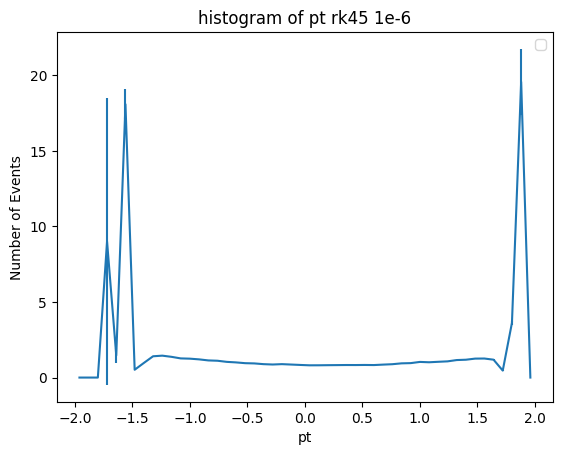

In [8]:
data_contents, bins_data ,  _ = plt.hist(data_jets[:,0], bins=50, range=(-2, 2), alpha=0.7, label='pt')
plt.xlabel('pt')
plt.ylabel('Number of Events')
plt.title('histogram of pt')
plt.legend()
plt.show()
gen_contents, bins_gen ,  _ = plt.hist(gluon_jets[:,0], bins=50, range=(-2, 2), alpha=0.7, label='pt')
plt.xlabel('pt')
plt.ylabel('Number of Events')
plt.title('histogram of pt')
plt.legend()
plt.show()
bins = 0.5*(bins_gen[:-1] + bins_gen[1:])
print(bins_gen.shape, np.ma.divide(data_contents,gen_contents).filled(0).shape)
print(np.ma.divide(data_contents,gen_contents).filled(0))
#plt.plot(np.ma.divide(data_contents,gen_contents).filled(0))
overx = np.ma.divide(1,gen_contents).filled(0)
overy = np.ma.divide(1,data_contents).filled(0)
yerr = np.ma.divide(data_contents,gen_contents).filled(0) * np.sqrt(overx + overy)
plt.errorbar(bins, np.ma.divide(data_contents,gen_contents).filled(0), yerr=yerr)
plt.xlabel('pt')
plt.ylabel('Number of Events')
plt.title('histogram of pt rk45 1e-6')
plt.legend()
plt.show()

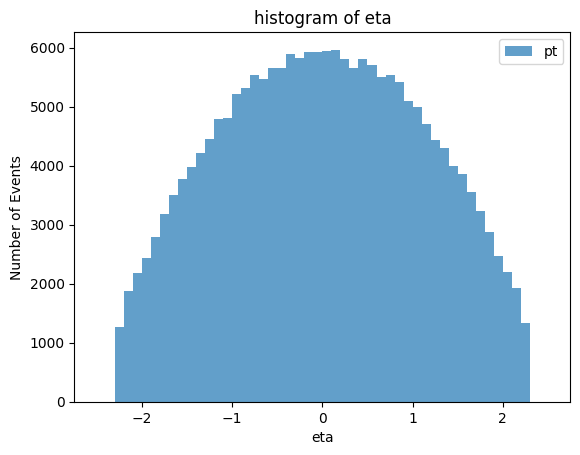

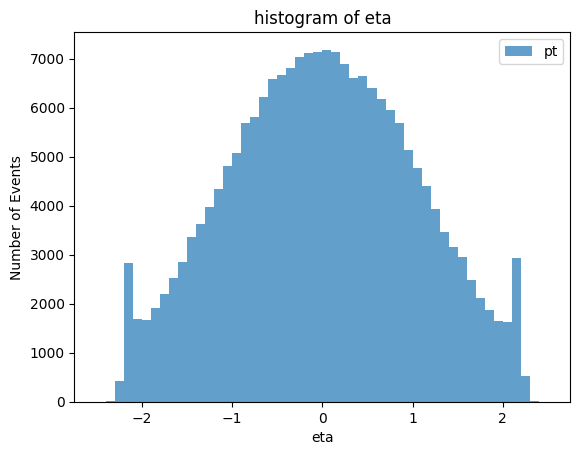

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(51,) (50,)
[0.         0.         3.04076739 0.66536689 1.30274136 1.4646283
 1.4679958  1.44106981 1.38577075 1.32385965 1.18052257 1.1670354
 1.1193654  1.1043398  0.99958446 1.02942338 0.93307571 0.95423262
 0.87928537 0.8604439  0.84950436 0.86649022 0.82991745 0.83352065
 0.83172066 0.8273221  0.83557423 0.84215871 0.85764047 0.87315679
 0.89239912 0.89038212 0.9312836  0.95130098 0.99125194 1.04808904
 1.07207822 1.12538071 1.24343055 1.26091082 1.3089983  1.42627561
 1.52145215 1.52850293 1.4909201  1.34558824 0.6608547  2.52173913
 0.         0.        ]


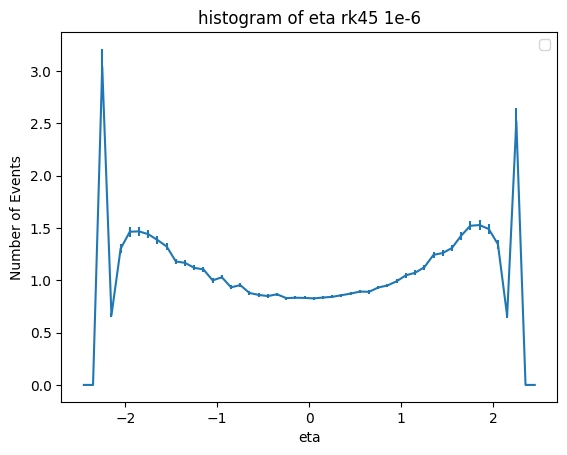

In [9]:
data_contents, bins_data ,  _ = plt.hist(data_jets[:,1], bins=50, range=(-2.5, 2.5), alpha=0.7, label='pt')
plt.xlabel('eta')
plt.ylabel('Number of Events')
plt.title('histogram of eta')
plt.legend()
plt.show()
gen_contents, bins_gen ,  _ = plt.hist(gluon_jets[:,1], bins=50, range=(-2.5, 2.5), alpha=0.7, label='pt')
plt.xlabel('eta')
plt.ylabel('Number of Events')
plt.title('histogram of eta')
plt.legend()
plt.show()
bins = 0.5*(bins_gen[:-1] + bins_gen[1:])
print(bins_gen.shape, np.ma.divide(data_contents,gen_contents).filled(0).shape)
print(np.ma.divide(data_contents,gen_contents).filled(0))
#plt.plot(np.ma.divide(data_contents,gen_contents).filled(0))
overx = np.ma.divide(1,gen_contents).filled(0)
overy = np.ma.divide(1,data_contents).filled(0)
yerr = np.ma.divide(data_contents,gen_contents).filled(0) * np.sqrt(overx + overy)
plt.errorbar(bins, np.ma.divide(data_contents,gen_contents).filled(0), yerr=yerr)
plt.xlabel('eta')
plt.ylabel('Number of Events')
plt.title('histogram of eta rk45 1e-6')
plt.legend()
plt.show()



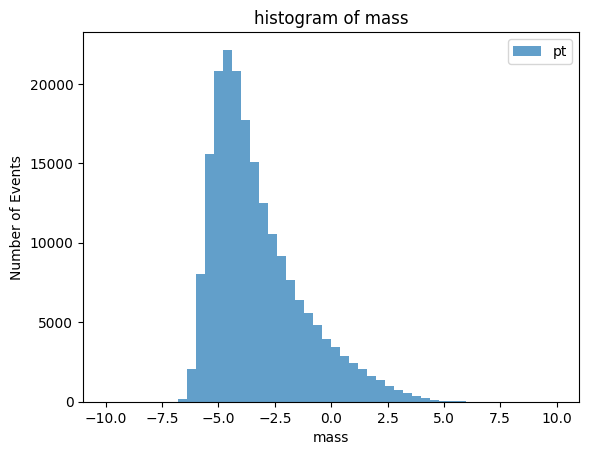

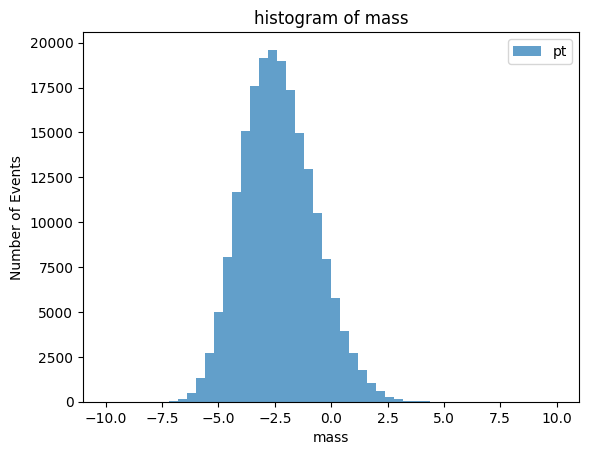

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(51,) (50,)
[ 0.          0.          0.          0.          0.          0.
  0.          0.08823529  1.07692308  4.03379722  6.14636015  5.7498155
  4.17880129  2.75195725  1.7806529   1.17338015  0.85865303  0.65211253
  0.53914418  0.48377737  0.44101738  0.42691896  0.43094816  0.46129677
  0.49862052  0.59314997  0.73107972  0.904482    1.16761042  1.5388941
  2.37172775  3.62093863  5.87692308  8.63076923 10.6969697   8.91666667
 25.2        13.25        0.         24.          0.          4.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


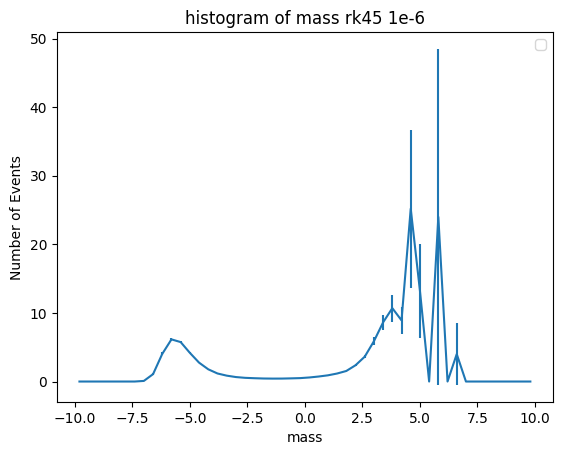

In [10]:
data_contents, bins_data ,  _ = plt.hist(data_jets[:,2], bins=50, range=(-10, 10), alpha=0.7, label='pt')
plt.xlabel('mass')
plt.ylabel('Number of Events')
plt.title('histogram of mass')
plt.legend()
plt.show()
gen_contents, bins_gen ,  _ = plt.hist(gluon_jets[:,2], bins=50, range=(-10, 10), alpha=0.7, label='pt')
plt.xlabel('mass')
plt.ylabel('Number of Events')
plt.title('histogram of mass')
plt.legend()
plt.show()
bins = 0.5*(bins_gen[:-1] + bins_gen[1:])
print(bins_gen.shape, np.ma.divide(data_contents,gen_contents).filled(0).shape)
print(np.ma.divide(data_contents,gen_contents).filled(0))
#plt.plot(np.ma.divide(data_contents,gen_contents).filled(0))
overx = np.ma.divide(1,gen_contents).filled(0)
overy = np.ma.divide(1,data_contents).filled(0)
yerr = np.ma.divide(data_contents,gen_contents).filled(0) * np.sqrt(overx + overy)
plt.errorbar(bins, np.ma.divide(data_contents,gen_contents).filled(0), yerr=yerr)
plt.xlabel('mass')
plt.ylabel('Number of Events')
plt.title('histogram of mass rk45 1e-6')
plt.legend()
plt.show()

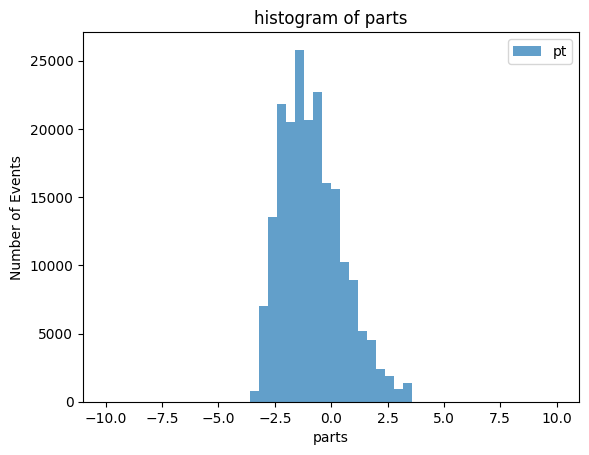

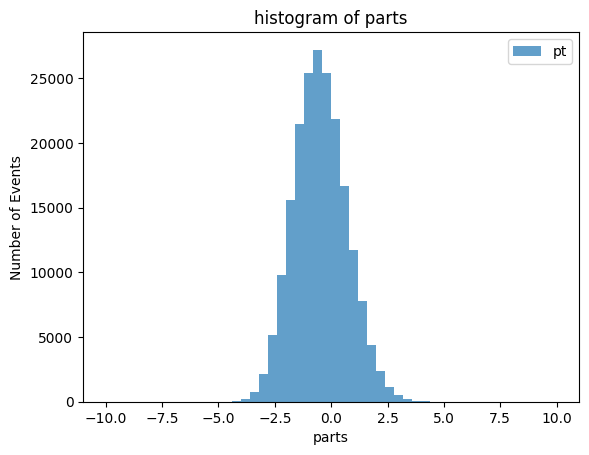

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(51,) (50,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.08988764 1.03230148 3.22258065
 2.61532523 2.223873   1.31761611 1.20155508 0.81355999 0.83353553
 0.62995595 0.7161382  0.61178655 0.76092698 0.67250934 1.02657883
 1.00252632 1.66756032 1.85028791 7.00505051 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


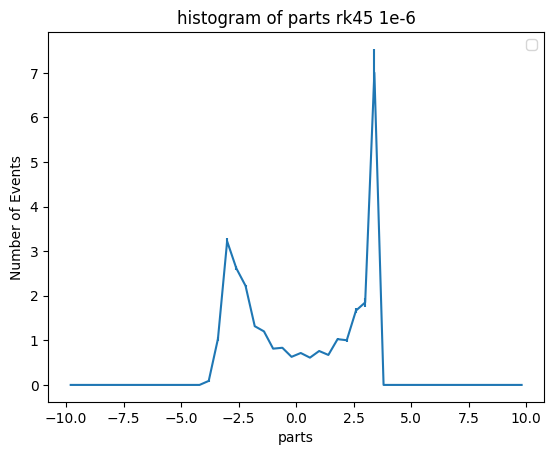

In [11]:
data_contents, bins_data ,  _ = plt.hist(data_jets[:,3], bins=50, range=(-10, 10), alpha=0.7, label='pt')
plt.xlabel('parts')
plt.ylabel('Number of Events')
plt.title('histogram of parts')
plt.legend()
plt.show()
gen_contents, bins_gen ,  _ = plt.hist(gluon_jets[:,3], bins=50, range=(-10, 10), alpha=0.7, label='pt')
plt.xlabel('parts')
plt.ylabel('Number of Events')
plt.title('histogram of parts')
plt.legend()
plt.show()
bins = 0.5*(bins_gen[:-1] + bins_gen[1:])
print(bins_gen.shape, np.ma.divide(data_contents,gen_contents).filled(0).shape)
print(np.ma.divide(data_contents,gen_contents).filled(0))
#plt.plot(np.ma.divide(data_contents,gen_contents).filled(0))
overx = np.ma.divide(1,gen_contents).filled(0)
overy = np.ma.divide(1,data_contents).filled(0)
yerr = np.ma.divide(data_contents,gen_contents).filled(0) * np.sqrt(overx + overy)
plt.errorbar(bins, np.ma.divide(data_contents,gen_contents).filled(0), yerr=yerr)
plt.xlabel('parts')
plt.ylabel('Number of Events')
plt.title('histogram of parts rk45 1e-6')
plt.legend()
plt.show()

In [7]:
#OLD CELLS AFTER THIS

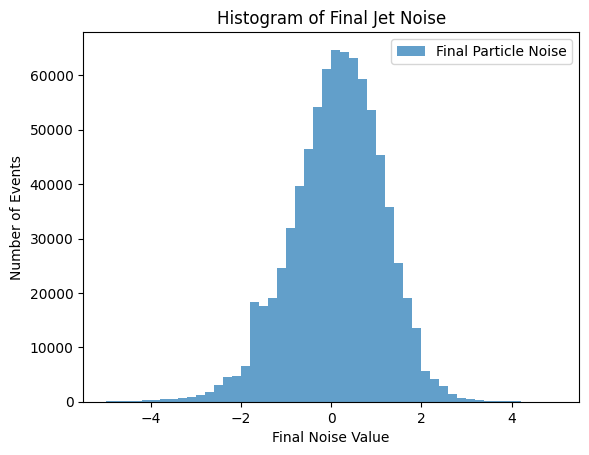

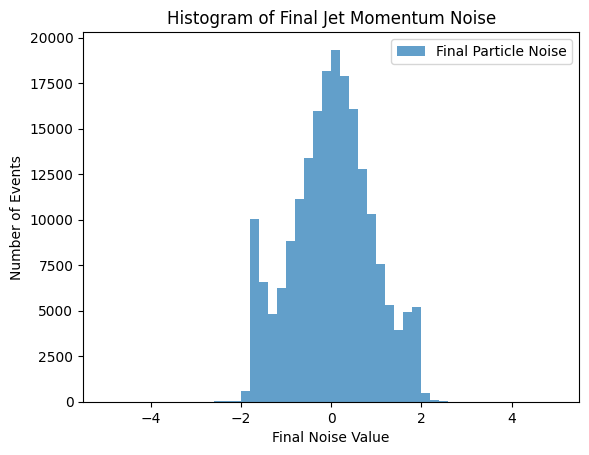

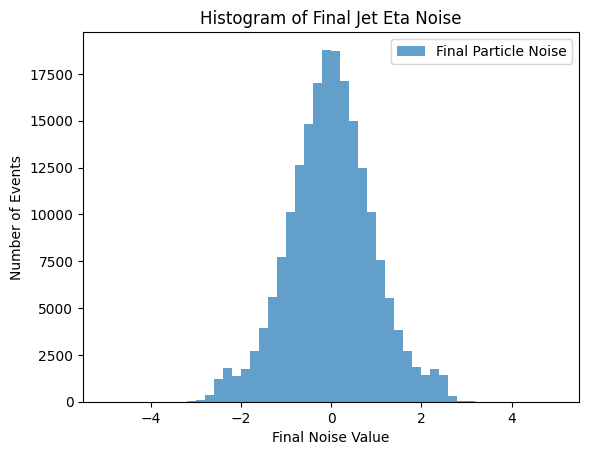

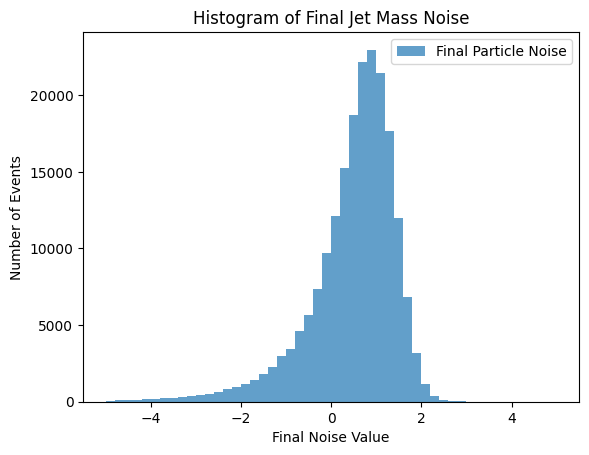

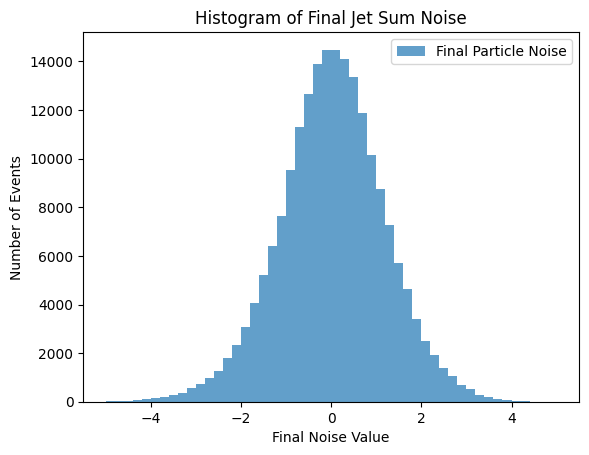

In [12]:
plt.hist(final_noise_jets.flatten(), bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of Final Jet Noise')
plt.legend()
plt.show()

plt.hist(final_noise_jets[:,0], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of Final Jet Momentum Noise')
plt.legend()
plt.show()
plt.hist(final_noise_jets[:,1], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of Final Jet Eta Noise')
plt.legend()
plt.show()
plt.hist(final_noise_jets[:,2], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of Final Jet Mass Noise')
plt.legend()
plt.show()
plt.hist(final_noise_jets[:,3], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of Final Jet Sum Noise')
plt.legend()
plt.show()

In [ ]:
plt.hist(init_noise_jets[:,0], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of init Jet Momentum Noise')
plt.legend()
plt.show()
plt.hist(init_noise_jets[:,1], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of init Jet Eta Noise')
plt.legend()
plt.show()
plt.hist(init_noise_jets[:,2], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of init Jet Mass Noise')
plt.legend()
plt.show()
plt.hist(init_noise_jets[:,3], bins=50, range=(-5, 5), alpha=0.7, label='Final Particle Noise')
plt.xlabel('Final Noise Value')
plt.ylabel('Number of Events')
plt.title('Histogram of init Jet Sum Noise')
plt.legend()
plt.show()

In [ ]:
print(final_noise_parts)

In [ ]:
print(init_noise_jets)

In [ ]:
print(final_noise_jets)

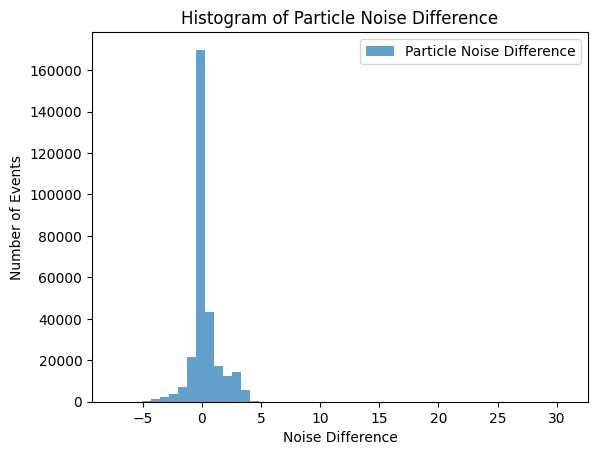

Initial Particle Noise: Mean = -0.00, Std Dev = 1.00
Final Particle Noise: Mean = -0.26, Std Dev = 1.48
Particle Noise Difference: Mean = 0.25, Std Dev = 1.19


In [4]:
in_part_flat = init_noise_parts.numpy().flatten()
fin_part_flat = final_noise_parts.flatten()
part_noise_diff = in_part_flat - fin_part_flat

plt.hist(part_noise_diff, bins=50, alpha=0.7, label='Particle Noise Difference')
plt.xlabel('Noise Difference')
plt.ylabel('Number of Events')
plt.title('Histogram of Particle Noise Difference')
plt.legend()
plt.show()

mean_initial = np.mean(in_part_flat)
std_initial = np.std(in_part_flat)
mean_final = np.mean(fin_part_flat)
std_final = np.std(fin_part_flat)
mean_diff = np.mean(part_noise_diff)
std_diff = np.std(part_noise_diff)

print("Initial Particle Noise: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_initial, std_initial))
print("Final Particle Noise: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_final, std_final))
print("Particle Noise Difference: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_diff, std_diff))


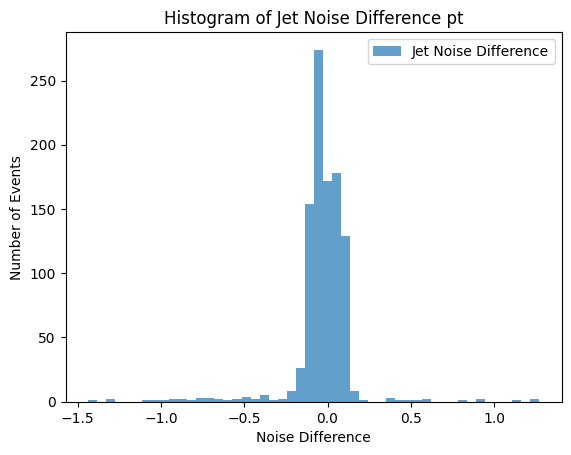

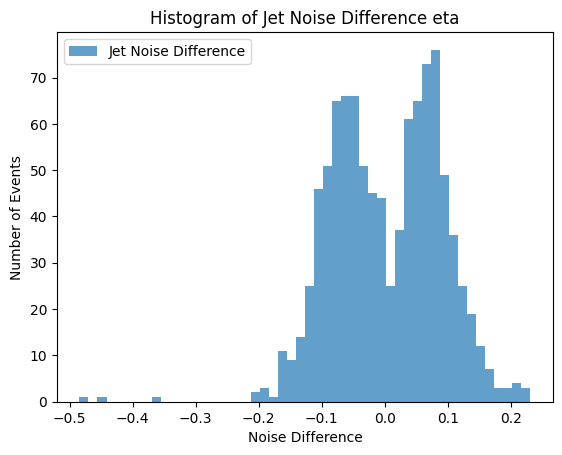

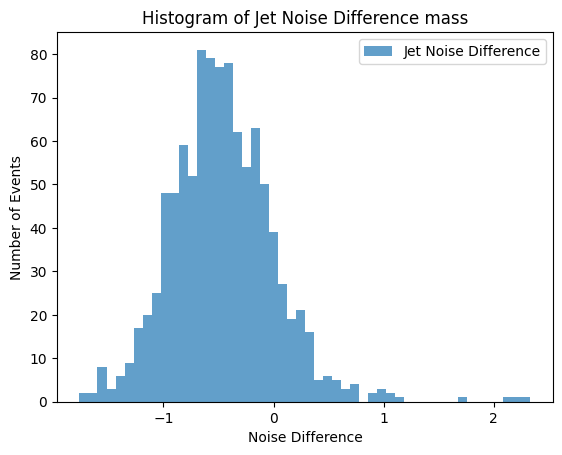

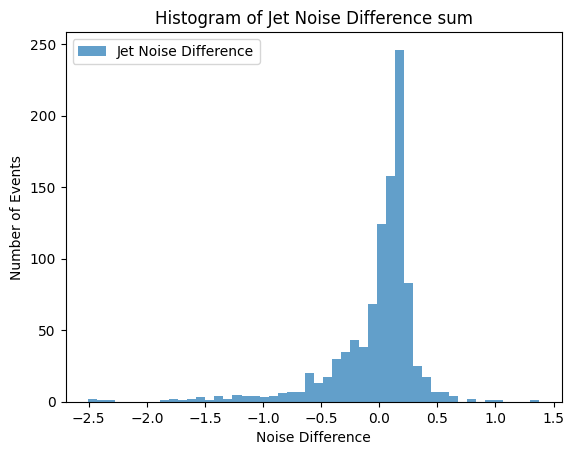

NameError: name 'in_jet_flat' is not defined

In [5]:
jet_noise_diff_pt = init_noise_jets[:,0] - final_noise_jets[:,0]
jet_noise_diff_eta = init_noise_jets[:,1] - final_noise_jets[:,1]
jet_noise_diff_mass = init_noise_jets[:,2] - final_noise_jets[:,2]
jet_noise_diff_sum = init_noise_jets[:,3] - final_noise_jets[:,3]

plt.hist(jet_noise_diff_pt, bins=50, alpha=0.7, label='Jet Noise Difference')
plt.xlabel('Noise Difference')
plt.ylabel('Number of Events')
plt.title('Histogram of Jet Noise Difference pt')
plt.legend()
plt.show()

plt.hist(jet_noise_diff_eta, bins=50, alpha=0.7, label='Jet Noise Difference')
plt.xlabel('Noise Difference')
plt.ylabel('Number of Events')
plt.title('Histogram of Jet Noise Difference eta')
plt.legend()
plt.show()

plt.hist(jet_noise_diff_mass, bins=50, alpha=0.7, label='Jet Noise Difference')
plt.xlabel('Noise Difference')
plt.ylabel('Number of Events')
plt.title('Histogram of Jet Noise Difference mass')
plt.legend()
plt.show()

plt.hist(jet_noise_diff_sum, bins=50, alpha=0.7, label='Jet Noise Difference')
plt.xlabel('Noise Difference')
plt.ylabel('Number of Events')
plt.title('Histogram of Jet Noise Difference sum')
plt.legend()
plt.show()

mean_initial_jet = np.mean(in_jet_flat)
std_initial_jet = np.std(in_jet_flat)
mean_final_jet = np.mean(fin_jet_flat)
std_final_jet = np.std(fin_jet_flat)
mean_diff_jet = np.mean(jet_noise_diff)
std_diff_jet = np.std(jet_noise_diff)

print("Initial Jet Noise: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_initial_jet, std_initial_jet))
print("Final Jet Noise: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_final_jet, std_final_jet))
print("Jet Noise Difference: Mean = {:.2f}, Std Dev = {:.2f}".format(mean_diff_jet, std_diff_jet))
